In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df_qt = pd.read_json("./ql_toy1_v2_comp_gen.json")
df_qt_2 =pd.read_json("./scenario2_v2_comp_gen.json")
df_dqn = pd.read_json("./dqn_toy1_comp_gen_comp_gen.json")
df_dqn2 = pd.read_json("./dqn_scen2_comp_gen.json")

df_lq =pd.read_json("./linear_toy1_v1_comp_gen.json")
df_lq2 =pd.read_json("./toy2_linear_v1_comp_gen.json")


gData = lambda df,df_dqn, df_l, cat: {
    'Q-Table': df['Q'][cat],
    'Linear Q-Function': df_l['LQ'][cat],
    'DQN': df_dqn['DQN'][cat],
    'Heuristic': df['heuristic'][cat],
    'Random': df['random'][cat],
    'No Action': df['no_action'][cat],
}

qData = lambda df,df_dqn,df_l, cat: {
    'Q-Table': df['Q'][cat],
    'Linear Q-Function': df_l['LQ'][cat],
    'DQN': df_dqn['DQN'][cat],
    'Heuristic': df['heuristic'][cat],
    'Random': df['random'][cat],
    'No Action': df['no_action'][cat],
}



In [32]:
df_lq2

,LQ
rewards,"[-48743.0, -64881.0, -56431.0, -49779.0, -5746..."
completed,"[757.0, 898.0, 863.0, 651.0, 988.0, 1060.0, 12..."
dropped,"[290.0, 435.0, 283.0, 429.0, 291.0, 405.0, 398..."
man_det,"[0.8, 0.8571428571428571, 1.0, 0.8571428571428..."
invalid,"[901.0, 1198.0, 1028.0, 917.0, 1062.0, 1256.0,..."
invalid_time,"[239.0, 333.0, 381.0, 266.0, 311.0, 390.0, 388..."


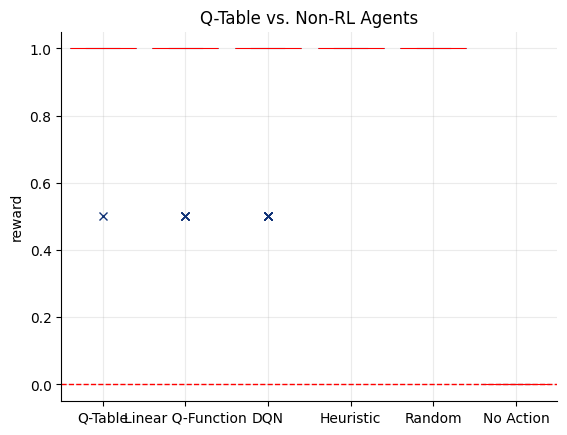

In [38]:

# Plotting multiple boxplots on the same axis
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(qData(df_qt, df_dqn,df_lq ,"man_det")),color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"},medianprops={"color": "r"},)
sns.despine()
plt.title("Q-Table vs. Non-RL Agents")
plt.ylabel("reward")
plt.grid(alpha=.25)
plt.show()

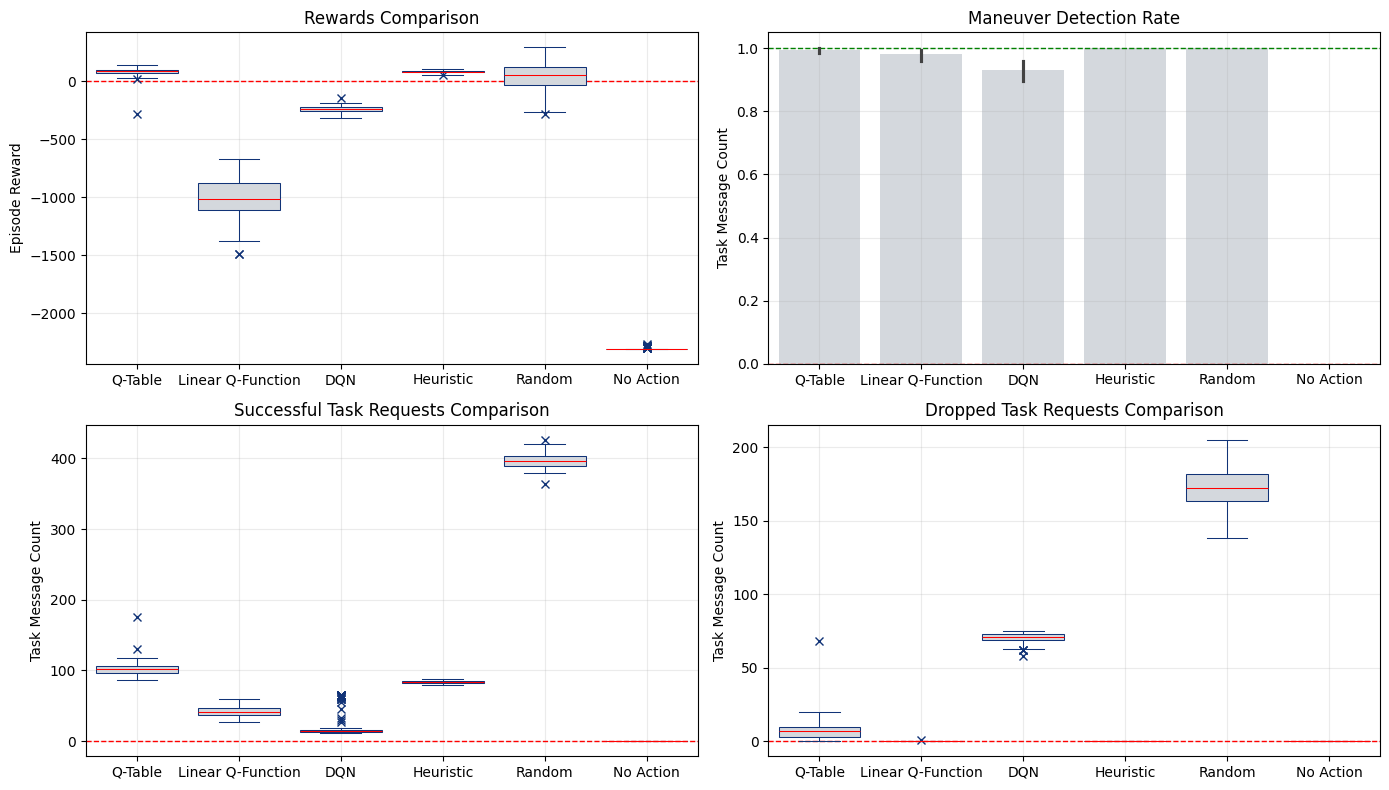

In [39]:
# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 8))  # 2 rows, 2 columns

# Plot each boxplot on a different subplot

# First subplot (top-left)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(qData(df_qt, df_dqn, df_lq, "rewards")), color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"}, medianprops={"color": "r"}, ax=axes[0, 0])
axes[0, 0].set_title('Rewards Comparison')
axes[0, 0].grid(alpha=.25)
axes[0, 0].set_ylabel('Episode Reward')

# Second subplot (top-right)
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(qData(df_qt, df_dqn, df_lq, "completed")), color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"}, medianprops={"color": "r"}, ax=axes[1, 0])
axes[1, 0].set_title('Successful Task Requests Comparison')
axes[1, 0].grid(alpha=.25)
axes[1, 0].set_ylabel('Task Message Count')

# Third subplot (bottom-left)
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(qData(df_qt, df_dqn, df_lq, "dropped")), color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"}, medianprops={"color": "r"}, ax=axes[1, 1])
axes[1, 1].set_title('Dropped Task Requests Comparison')
axes[1, 1].grid(alpha=.25)
axes[1, 1].set_ylabel('Task Message Count')

# Fourth subplot (bottom-right) - if you want to leave it empty or add another plot
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=1)
axes[0, 1].axhline(y=1, color='g', linestyle='--', linewidth=1)
sns.barplot(data=pd.DataFrame(qData(df_qt, df_dqn, df_lq, "man_det")), color="#D3D8DE", linewidth=2, ax=axes[0, 1])
axes[0, 1].set_title('Maneuver Detection Rate')
axes[0, 1].grid(alpha=.25)
axes[0, 1].set_ylabel('Task Message Count')

# Adjust spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()


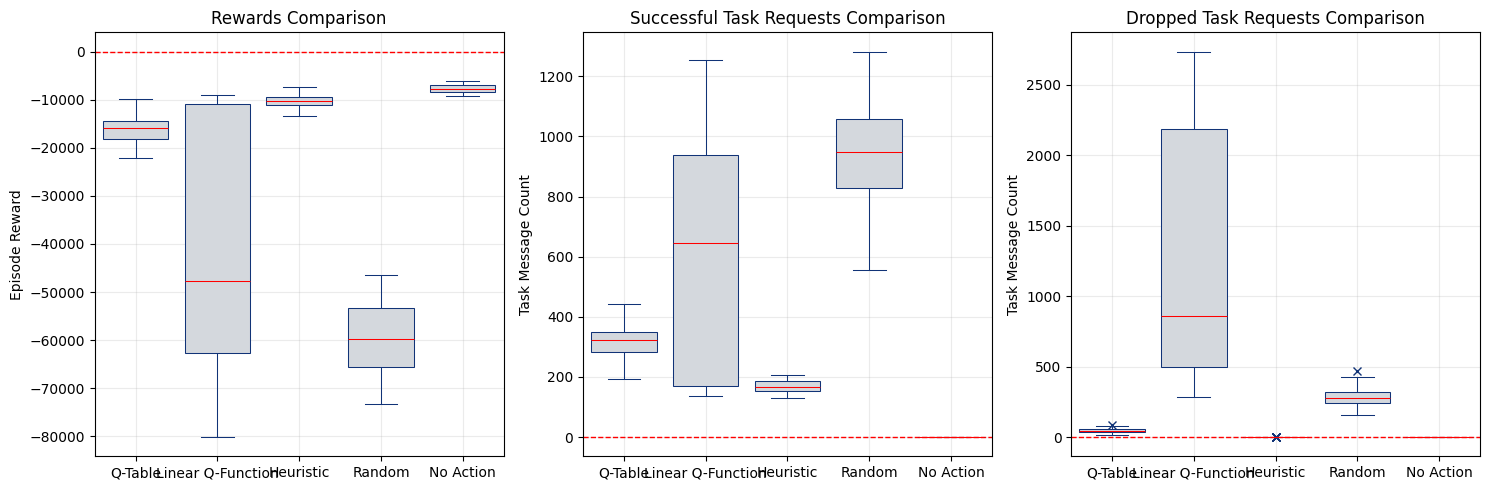

In [ ]:

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot each boxplot on a different subplot

axes[0].axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(gData(df_qt_2,df_dqn2, df_lq2,"rewards")),color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"},medianprops={"color": "r"}, ax=axes[0])
axes[0].set_title('Rewards Comparison')
axes[0].grid(alpha=.25)
axes[0].set_ylabel('Episode Reward')


axes[1].axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(gData(df_qt_2,df_dqn2,df_lq2,"completed")),color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"},medianprops={"color": "r"}, ax=axes[1])
axes[1].set_title('Successful Task Requests Comparison')
axes[1].grid(alpha=.25)
axes[1].set_ylabel('Task Message Count')


axes[2].axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(gData(df_qt_2,df_dqn2,df_lq2,"dropped")),color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"},medianprops={"color": "r"}, ax=axes[2])
axes[2].set_title('Dropped Task Requests Comparison')
axes[2].grid(alpha=.25)
axes[2].set_ylabel('Task Message Count')



# Remove the spines around each plot


# Adjust spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()

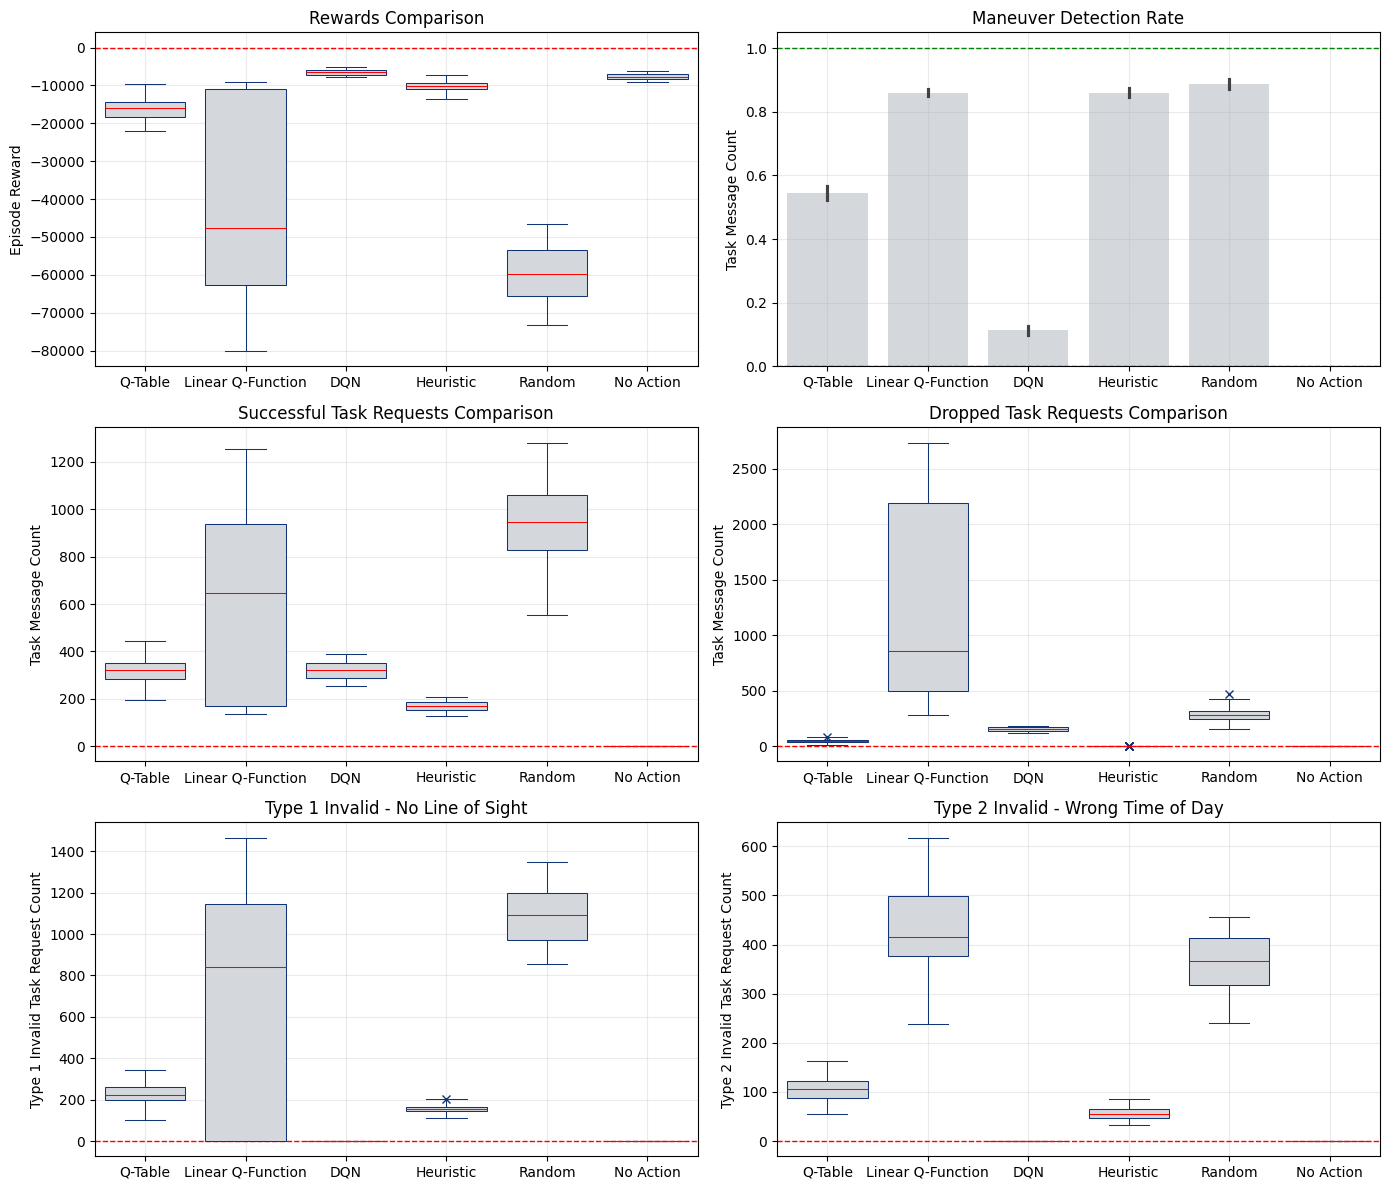

In [43]:
# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(14, 12))  # 2 rows, 2 columns

# Plot each boxplot on a different subplot

# First subplot (top-left)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(gData(df_qt_2,df_dqn2, df_lq2, "rewards")), color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"}, medianprops={"color": "r"}, ax=axes[0, 0])
axes[0, 0].set_title('Rewards Comparison')
axes[0, 0].grid(alpha=.25)
axes[0, 0].set_ylabel('Episode Reward')

axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=1)
axes[0, 1].axhline(y=1, color='g', linestyle='--', linewidth=1)
sns.barplot(data=pd.DataFrame(gData(df_qt_2,df_dqn2, df_lq2, "man_det")), color="#D3D8DE", linewidth=2, ax=axes[0, 1])
axes[0, 1].set_title('Maneuver Detection Rate')
axes[0, 1].grid(alpha=.25)
axes[0, 1].set_ylabel('Task Message Count')

axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(gData(df_qt_2, df_dqn2,df_lq2, "completed")), color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"}, medianprops={"color": "r"}, ax=axes[1, 0])
axes[1, 0].set_title('Successful Task Requests Comparison')
axes[1, 0].grid(alpha=.25)
axes[1, 0].set_ylabel('Task Message Count')

axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(gData(df_qt_2,df_dqn2, df_lq2, "dropped")), color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"}, medianprops={"color": "r"}, ax=axes[1, 1])
axes[1, 1].set_title('Dropped Task Requests Comparison')
axes[1, 1].grid(alpha=.25)
axes[1, 1].set_ylabel('Task Message Count')


axes[2, 0].axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(gData(df_qt_2,df_dqn2, df_lq2, "invalid")), color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"}, medianprops={"color": "r"}, ax=axes[2, 0])
axes[2, 0].set_title('Type 1 Invalid - No Line of Sight')
axes[2, 0].grid(alpha=.25)
axes[2, 0].set_ylabel('Type 1 Invalid Task Request Count')

axes[2, 1].axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(gData(df_qt_2,df_dqn2, df_lq2, "invalid_time")), color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"}, medianprops={"color": "r"}, ax=axes[2, 1])
axes[2, 1].set_title('Type 2 Invalid - Wrong Time of Day')
axes[2, 1].grid(alpha=.25)
axes[2, 1].set_ylabel('Type 2 Invalid Task Request Count')


# Fourth subplot (bottom-right) - if you want to leave it empty or add another plot


# Adjust spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()


In [42]:
df_dqn2

,DQN
rewards,"[-7477.0, -5255.0, -6002.0, -6970.0, -5957.0, ..."
completed,"[365.0, 259.0, 295.0, 342.0, 289.0, 300.0, 343..."
dropped,"[177.0, 122.0, 142.0, 164.0, 143.0, 143.0, 164..."
man_det,"[0.14285714285714202, 0.14285714285714202, 0.1..."
invalid,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
invalid_time,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
